In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
sns.set(palette ='Set2', style = 'darkgrid')

In [4]:
INPUT_PATH = 'data/input'
TRANSFORM_PATH = 'data/transformations'

In [5]:
df = pd.read_excel(f'{TRANSFORM_PATH}/tests results.xlsx')

In [6]:
df_orig = df.copy()

In [7]:
df.head()

,Курс,Стать,Оцінка з математичої дисципліни,Оцінка з гуманітарної дисципліни,Оцінка з дисципліни за спеціальністю,Тест №1,Тест №1 рівень,Тест №2.а,Тест №2.б,Тест №2.в,Тест №2.а рівень,Тест №2.б рівень,Тест №2.в рівень,Тест №3.1,Тест №3.2,Тест №3.3,Тест №3.4,Тест №3.5,Тест №3.6,Тест №3.7
0,1,ж,100,74,95,8,полюс не виражений,2,2,1,низький рівень внутрішньої мотивації,низький рівень внутрішньої мотивації,низький рівень внутрішньої мотивації,3.00,3.2,4.2,3.166667,3.0,3.428571,2.0
1,1,ч,86,80,88,7,уникнення невдачі,11,10,12,середній рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,3.50,2.4,3.4,4.333333,4.0,4.000000,3.4
2,1,ж,82,94,89,9,полюс не виражений,15,8,8,високий рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,3.75,3.2,3.8,4.833333,3.0,4.142857,3.4
3,1,ч,76,76,76,9,полюс не виражений,11,9,11,середній рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,3.50,4.4,4.0,3.833333,4.5,3.714286,4.6
4,1,ж,71,71,71,6,уникнення невдачі,10,5,8,середній рівень внутрішньої мотивації,низький рівень внутрішньої мотивації,середній рівень внутрішньої мотивації,3.50,3.0,4.0,4.166667,3.5,4.000000,3.4


# Завдання 3/1 (Кореляційний аналіз)

Взяти дві змінні для дослідження кореляційної залежності.
- Для теста №1 за одну змінну взяти  дані деякої групи, в якості другої змінної взяти оцінки з математики 
- Для теста №2 за одну змінну взяти бали мотивації для математичного предмета, в якості другої змінної бали мотивації цих же студентів для гуманітарного предмета.
- Для теста №3 за одну змінну взяти бали мотивації за шкалою “професійна діяльність”, в якості другої змінної бали мотивації цих же студентів для якоїсь іншої шкали.


In [8]:
years = [1,2]
df = df[df['Курс'].isin(years)]
print(f'Для завдання були взяті курси {", ".join(map(str, years))}.\
    Це {df.shape[0]} студенти')

Для завдання були взяті курси 1, 2.    Це 54 студенти


In [9]:
test_pairs = [
    ('Тест №1', 'Оцінка з математичої дисципліни'),
    ('Тест №2.а', 'Тест №2.в'),
    ('Тест №3.4', 'Тест №3.2'),
]

### 1)	Знайти вибіркові коефіцієнту кореляції Пірсона, Спірмена та Кенделла та перевірити їхню значущість за допомогою параметричного критерію Пірсона та непараметричних Спірмена та Кенделла.
### 2)	Застосувати пакет можливості Пайтона для знаходження коефіцієнту кореляції Пірсона, Спірмена та Кенделла і перевірки цих коефіцієнтів на значущість. 

In [10]:
def pearson_corr(x, y):
    x, y = np.asarray(x), np.asarray(y)
    assert(np.isnan(x).sum()+np.isnan(y).sum()==0)
    assert(len(x) == len(y))
    mu_x, mu_y = x.mean(), y.mean()
    
    return np.sum((x - mu_x) * (y - mu_y)) \
    /np.sqrt((sum((x - mu_x)**2) )* (sum((y - mu_y)**2)))

def spearman_corr(x, y):
    x, y = np.asarray(x), np.asarray(y)
    assert(np.isnan(x).sum()+np.isnan(y).sum()==0)
    assert(len(x) == len(y))
    n = len(x)
    rankmethod = 'average'
    d = rankdata(x, rankmethod) - rankdata(y, rankmethod)
#     print(d)
#     print(rankdata(-x), rankdata(-y))
    return 1 - 6 *(d**2).sum() / (n**3-n)

def kendall_corr(x, y):
    x, y = np.asarray(x), np.asarray(y)
    assert(np.isnan(x).sum()+np.isnan(y).sum()==0)
    assert(len(x) == len(y))
    n = len(x)
    x_rank, y_rank = rankdata(x), rankdata(y)
    p, q, t, u, s = 0,0,0,0,0
    for i in range(n-1):
        x_i, y_i = x_rank[i], y_rank[i]
        x_j, y_j = x_rank[i+1:], y_rank[i+1:]
        p+=sum((y_i > y_j) & (x_i > x_j)) + sum((y_i < y_j) & (x_i < x_j))
        q+=sum((y_i < y_j) & (x_i > x_j)) + sum((y_i > y_j) & (x_i < x_j))
        t+=sum(x_i == x_j)
        u+=sum(y_i == y_j)
        s+=sum((x_i == x_j) & (y_i == y_j))

    t, u = t-s, u-s
    return (p-q) / np.sqrt((p+q+t) * (p+q+u))

def p_val_corr(r, n):
    df = n-2
    t_val = (r * np.sqrt(df)) / np.sqrt(1-r**2)
    return  (1 - stats.t.cdf(t_val,df=df))*2

In [11]:
for k, (y_name, x_name) in enumerate(test_pairs):
    print(f'\n\nТЕСТ №{k+1}')
    x, y = df[x_name], df[y_name]
    print(f'y - {y_name}, x - {x_name}')
    
    # manual calculations
    r = pearson_corr(x, y)
    ro = spearman_corr(x, y)
    tau = kendall_corr(x, y)
    
    # using scipy
    pearson = stats.pearsonr(x,y)
    spearman = stats.spearmanr(x,y)
    kendall = stats.kendalltau(x,y)
    
    cor_methods = ['pearson', 'spearman', 'kendall']

    df_res_corr = pd.DataFrame(
        index = ['manual', 'python'], 
        columns = cor_methods,
        data = [[r, ro, tau], [pearson[0], spearman[0], kendall[0]]]
    )
    
#     df_res_pval = df_res_corr.copy()
#     df_res_pval.loc['manual'] = df_res_corr.loc['manual'].apply(lambda x: p_val_corr(x, df.shape[0]))
#     df_res_pval.loc['python'] = [pearson[1], spearman[1], kendall[1]]
    df_res_pval = df_res_corr.apply(lambda x: p_val_corr(x, df.shape[0])).copy()

    
    df_res_corr.index.name = 'corr'
    df_res_pval.index.name = 'p_val'

    display(df_res_corr)
    display(df_res_pval)



ТЕСТ №1
y - Тест №1, x - Оцінка з математичої дисципліни


,pearson,spearman,kendall
corr,,,
manual,0.236726,0.278178,0.201268
python,0.236726,0.272943,0.201268


,pearson,spearman,kendall
p_val,,,
manual,0.084805,0.041676,0.144459
python,0.084805,0.045839,0.144459




ТЕСТ №2
y - Тест №2.а, x - Тест №2.в


,pearson,spearman,kendall
corr,,,
manual,0.740098,0.692758,0.593878
python,0.740098,0.687442,0.593878


,pearson,spearman,kendall
p_val,,,
manual,1.607354e-10,6.470039e-09,0.000002
python,1.607354e-10,9.380078e-09,0.000002




ТЕСТ №3
y - Тест №3.4, x - Тест №3.2


,pearson,spearman,kendall
corr,,,
manual,0.149475,0.150353,0.109268
python,0.149475,0.140972,0.109268


,pearson,spearman,kendall
p_val,,,
manual,0.280684,0.277837,0.431562
python,0.280684,0.309259,0.431562


Кореляція та показники значущості Пірсона та Кенделла співпадають повністю, Спірмена - з точністю до сотих.

Загалом, маємо високий показник всіх типів кореляції для другого тесту, також можемо стверджувати, що кореліція є значимою для цього тесту і не дорівнює 0 (p_value < 0.05).

Також, кореляція Спірмана не є нульовою в першому тесті (p_value < 0.05), але значної кореляції між першими тестом і оцінкою з математики немає.

Кореляція між всіма парами х та у є додатньою, отже всюди залежність є позитивною.

# Завдання 3/2 (Регресійний аналіз):

In [12]:
y, x = df['Тест №2.а'], df['Тест №2.в']

### 3)	Побудувати регресійну модель залежності однієї змінної  від іншої метоом найменших квадратів та за умови відомого коефіцієнта кореляції Пірсона. 

In [13]:
print(f'y - {y.name}, x - {x.name}')

y - Тест №2.а, x - Тест №2.в


In [14]:
class MyLinReg():
    def _init_(self):
        return
    
    def _corr(self):
        return stats.pearsonr(self.x, self.y)[0]

    def _slope(self):
        return self.corr * np.std(self.y) / np.std(self.x)

    def _intercept(self):
        return np.mean(self.y) - self.slope * np.mean(self.x)

    def fit(self, X:pd.Series, Y:pd.Series):
        self.x = X.copy()
        self.y = Y.copy()
        self.n = len(self.x)
        self.df = self.n - 2
        self.corr = self._corr()
        self.slope = self._slope()
        self.intercept = self._intercept()


In [15]:
reg = MyLinReg()
reg.fit(x, y)
print(f'a = {reg.intercept:.4f}, b = {reg.slope:.4f}')
print(f'Рівняння регресії має вигляд: y = {reg.intercept:.4f} + {reg.slope:.4f} * x')

a = 4.2690, b = 0.6347
Рівняння регресії має вигляд: y = 4.2690 + 0.6347 * x


### 4)	Побудувати регресійну модель в Пайтоні,  провести аналіз залишків різними методами. 

In [16]:
reg = LinearRegression()
reg.fit(pd.DataFrame(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(f'a = {reg.intercept_:.4f}, b = {reg.coef_[0]:.4f}')

a = 4.2690, b = 0.6347


Коефіцієнти пораховані за допомогою бібліотеки sklearn співпадають з порахованими вручну.

In [18]:
y_pred = reg.predict(pd.DataFrame(x))

Побудуємо пряму за рівнянням отриманим вище.

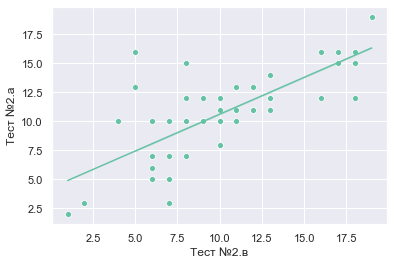

In [19]:
sns.scatterplot(x, y)
sns.lineplot(x, y_pred)

З рисунку видно, що загагом модель правильно "вхоплює" напрям, але має не дуже гарну прогнозну силу.

Загалом, схоже, що нелінійна модель може описати краще ці дані (наприклад y = a+b*sqrt(x)).

In [20]:
y, y_pred = np.asarray(y), np.asarray(y_pred)

df_res = pd.Series(data={
    'SSE': sum((y - y_pred)**2),
    'SST': sum((y - y.mean())**2),
    'SSR': sum((y_pred - y.mean())**2),
})

df_res['R^2'] = 1 -  df_res['SSE'] / df_res['SST']
df_res['r'] = np.sqrt(df_res['R^2'])

In [21]:
df_res

SSE    317.859759
SST    702.833333
SSR    384.973574
R^2      0.547745
r        0.740098
dtype: float64

З статистик наведених вище, можна сказати, що лінійна регресія не дуже підходить для цих даних.